In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D
import matplotlib.pyplot as plt

In [ ]:
lokasi_file = 'Twitter_Data.csv'
df = pd.read_csv(lokasi_file)

In [ ]:
df.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [ ]:
sentimen_mapping = {-1.0: 0, 0: 1, 1: 2}
df['category'] = df['category'].map(sentimen_mapping)

In [43]:
print("Label Sentimen Setelah Pemetaan:")
print(df['category'].unique())

Label Sentimen Setelah Pemetaan:
[0.0, 1.0, 2.0, NaN]
Categories (3, float64): [0.0, 1.0, 2.0]


<ipython-input-43-f2b5df81752f>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(df['category'].unique())


In [ ]:
df['category'] = df['category'].astype('category')

In [ ]:
df['clean_text'] = df['clean_text'].str.replace(r'@\w+', '')

<ipython-input-24-8dc34d50336a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace(r'@\w+', '')


In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,0.0
1,talk all the nonsense and continue all the dra...,1.0
2,what did just say vote for modi welcome bjp t...,2.0
3,asking his supporters prefix chowkidar their n...,2.0
4,answer who among these the most powerful world...,2.0


In [ ]:
df['clean_text'] = df['clean_text'].astype(str)

In [ ]:
df['clean_text'].fillna('', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   clean_text  162980 non-null  object  
 1   category    162973 non-null  category
dtypes: category(1), object(1)
memory usage: 1.4+ MB


In [ ]:
sentiment_counts = df['category'].value_counts()
sentiment_counts

2.0    72250
1.0    55213
0.0    35510
Name: category, dtype: int64

In [ ]:
teks = df['clean_text'].values
label = df['category'].values

In [47]:
total_data_teks = len(teks)
total_data_label = len(label)
print("Total Jumlah Data Teks :", total_data_teks)
print("Total Jumlah Data Label :", total_data_label)

Total Jumlah Data Teks : 162980
Total Jumlah Data Label : 162980


In [ ]:
teks_latih, teks_test, label_latih, label_test  = train_test_split(teks, label, test_size=0.2)

In [48]:
print("Jumlah Data Pada Set Pelatihan :", len(teks_latih))
print("Jumlah Data Pada Set Validasi :", len(teks_test))

Jumlah Data Pada Set Pelatihan : 130384
Jumlah Data Pada Set Validasi : 32596


In [ ]:
label_encoder = LabelEncoder()
label_latih_encoded = label_encoder.fit_transform(label_latih)
label_test_encoded = label_encoder.transform(label_test)

In [ ]:
tokenizer = Tokenizer(num_words=1000000)
tokenizer.fit_on_texts(teks_latih)

sekuens_latih  = tokenizer.texts_to_sequences(teks_latih)
sekuens_test  = tokenizer.texts_to_sequences(teks_test)

panjang_sekuens = max(len(seq) for seq in sekuens_latih )

padded_latih  = pad_sequences(sekuens_latih, maxlen=panjang_sekuens)
padded_test = pad_sequences(sekuens_test , maxlen=panjang_sekuens)


In [ ]:
indeks_kata = tokenizer.word_index
ukuran_kata = len(indeks_kata)

In [ ]:
checkpoint_filepath = 'Model-NLP-Sentimen-Twitter-IDCAMP-2023.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

In [ ]:
input_dim = ukuran_kata + 1

model = Sequential([
    Input(shape=(panjang_sekuens,)),
    Embedding(input_dim, 20),
    LSTM(16, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs  = 5
history = model.fit(padded_latih, label_latih_encoded , epochs=num_epochs , validation_data=(padded_test, label_test_encoded), callbacks=[model_checkpoint_callback])

Epoch 1/5
4075/4075 [==============================] - 204s 49ms/step - loss: 0.4330 - accuracy: 0.8347 - val_loss: 0.1906 - val_accuracy: 0.9415
Epoch 2/5
4075/4075 [==============================] - 198s 49ms/step - loss: 0.1264 - accuracy: 0.9611 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 3/5
4075/4075 [==============================] - 198s 48ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.1065 - val_accuracy: 0.9676
Epoch 4/5
4075/4075 [==============================] - 197s 48ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.1198 - val_accuracy: 0.9646
Epoch 5/5
4075/4075 [==============================] - 202s 50ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.1359 - val_accuracy: 0.9658


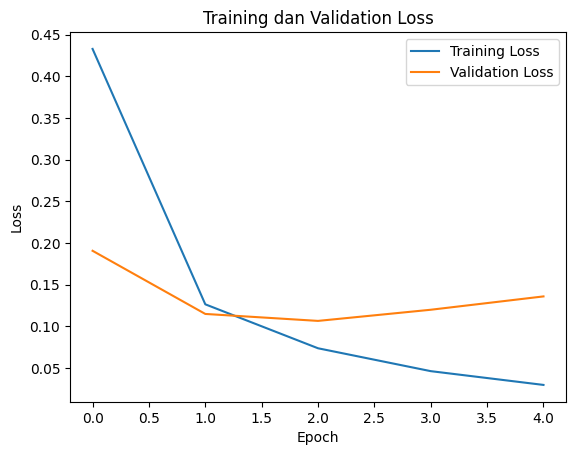

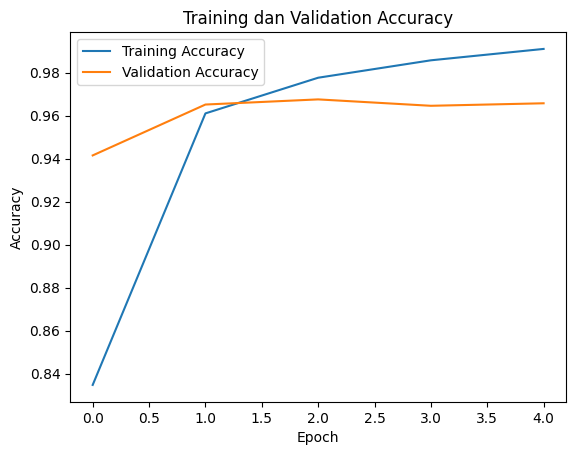

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training dan Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training dan Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
